![Movie popcorn on red background](assets/redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the netflix_data.csv data to understand what may be contributing to movies getting shorter over time. Your analysis will follow these steps:

- Load the CSV file and store as netflix_df.
- Filter the data to remove TV shows and store as netflix_subset.
- Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
- Filter netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
- Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
- After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes", "no", or "maybe" to the variable answer.
- Click the "Submit Project" button to check your solution.

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts legend handling 

# Load the CSV data into DataFrames
netflix_df = pd.read_csv("data/netflix_data.csv", index_col=0)
netflix_df

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries


In [2]:
# Chek what are the show types
netflix_df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [3]:
# Filter data to remove TV Shows
netflix_subset = netflix_df[netflix_df["type"] != "TV Show"]
netflix_subset

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies
...,...,...,...,...,...,...,...,...,...,...
s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas


In [4]:
# Select columns we want to keep
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

# We can also drop the columns we don't want instead of selecting
#netflix_movies = netflix_subset.drop(["type", "director", "cast", "date_added", "description"], axis=1)

netflix_movies

,title,country,genre,release_year,duration
show_id,,,,,
s2,7:19,Mexico,Dramas,2016,93
s3,23:59,Singapore,Horror Movies,2011,78
s4,9,United States,Action,2009,80
s5,21,United States,Dramas,2008,123
s7,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
s7782,Zoom,United States,Children,2006,88
s7783,Zozo,Sweden,Dramas,2005,99
s7784,Zubaan,India,Dramas,2015,111


In [5]:
# Find movies shorter than 60min
short_movies = netflix_movies[netflix_movies["duration"] < 60]
short_movies

,title,country,genre,release_year,duration
show_id,,,,,
s36,#Rucker50,United States,Documentaries,2016,56
s56,100 Things to do Before High School,United States,Uncategorized,2014,44
s68,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
s102,3 Seconds Divorce,Canada,Documentaries,2018,53
s147,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
s7680,WWII: Report from the Aleutians,United States,Documentaries,1943,45
s7693,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
s7719,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54


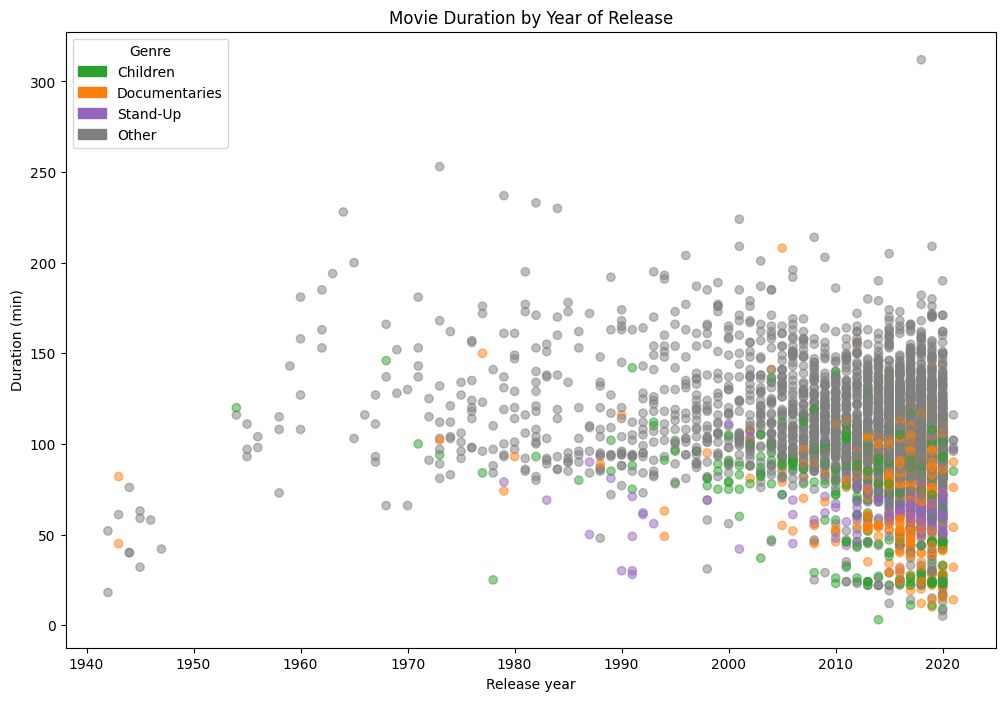

In [6]:
# Loop to create a list of colors based on genre
colors = []
for genre in netflix_movies["genre"]:
    if "Children" in genre:
        colors.append("tab:green") # green
    elif "Documentaries" in genre:
        colors.append("tab:orange") # orange
    elif "Stand-Up" in genre:
        colors.append("tab:purple") # purple
    else:
        colors.append("tab:gray") # gray

# Figure
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors, alpha=0.5)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
# Create a custom legend with patches
children = mpatches.Patch(color='tab:green', label='Children')
documentaries = mpatches.Patch(color='tab:orange', label='Documentaries')
stand_up = mpatches.Patch(color='tab:purple', label='Stand-Up')
other = mpatches.Patch(color='tab:gray', label='Other')
plt.legend(handles=[children, documentaries, stand_up, other], title="Genre")
plt.show()

# Save the plot as a PNG file
fig.savefig("generated_images/movie_duration_by_year.png")


Are we certain that movies are getting shorter?

> Possibly, but further analysis is required to confirm this. The number of movies released annually varies, which is an important factor to consider. In recent years, the increase in the number of movies released has resulted in a lower average duration. To ascertain whether movie durations are indeed getting shorter, we need to compute the average duration of movies released each year.